In [11]:
import pandas as pd
import os

# File path
file_path = r'C:\Users\kiara\KiaraADS500B\Final Project\Dataset 1 (Bank Marketing)\bank_marketing.csv'

# Load the dataset with proper column names
if os.path.exists(file_path):
    df = pd.read_csv(file_path, sep=';')  
    print("Dataset loaded successfully.")
else:
    print(f"File not found: {file_path}")

# Print column names to verify
print("Columns in the dataset:", df.columns)


Dataset loaded successfully.
Columns in the dataset: Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')


In [17]:
import numpy as np
from pandas.api.types import CategoricalDtype

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check for and handle any categorical variables appropriately
for col in df.columns:
    if isinstance(df[col].dtype, CategoricalDtype):
        print(f"{col} is categorical")

# Define the lists of numerical, categorical, and ordinal variables
numerical_vars = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_vars = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']
ordinal_vars = ['education']

# Define the mapping for the ordinal variable 'education'
education_mapping = {
    'primary': 1,
    'secondary': 2,
    'tertiary': 3
}

# Apply the mapping to convert 'education' to numeric values
df['education'] = df['education'].map(education_mapping)

# Verify the conversion
print("Converted 'education' column:\n", df['education'].head())


Converted 'education' column:
 0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: education, dtype: float64


In [18]:
# Measures of centrality
print("Mean:\n", df[numerical_vars].mean())
print("Median:\n", df[numerical_vars].median())
print("Mode:\n", df[numerical_vars].mode())

# Measures of distribution
print("Standard Deviation:\n", df[numerical_vars].std())
print("Variance:\n", df[numerical_vars].var())
print("Description:\n", df[numerical_vars].describe())



Mean:
 age           40.924781
balance     1362.272058
day           15.806419
duration     258.163080
campaign       2.763841
pdays         40.197828
previous       0.580323
dtype: float64
Median:
 age          39.0
balance     448.0
day          16.0
duration    180.0
campaign      2.0
pdays        -1.0
previous      0.0
dtype: float64
Mode:
     age  balance  day  duration  campaign  pdays  previous
0  32.0        0   20       124         1     -1         0
Standard Deviation:
 age           10.610835
balance     3044.765829
day            8.322476
duration     257.527812
campaign       3.098021
pdays        100.128746
previous       2.303441
dtype: float64
Variance:
 age         1.125898e+02
balance     9.270599e+06
day         6.926361e+01
duration    6.632057e+04
campaign    9.597733e+00
pdays       1.002577e+04
previous    5.305841e+00
dtype: float64
Description:
                 age        balance           day      duration      campaign  \
count  43872.000000   45211.000000  

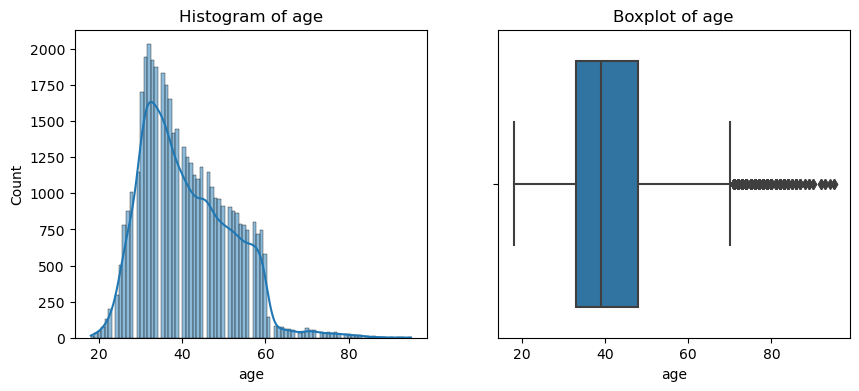

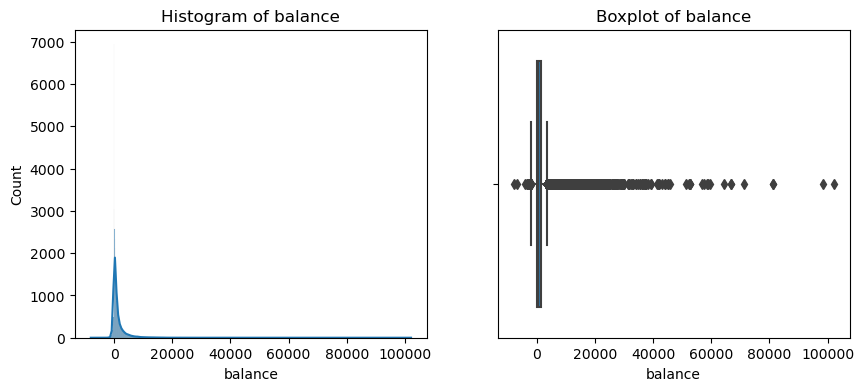

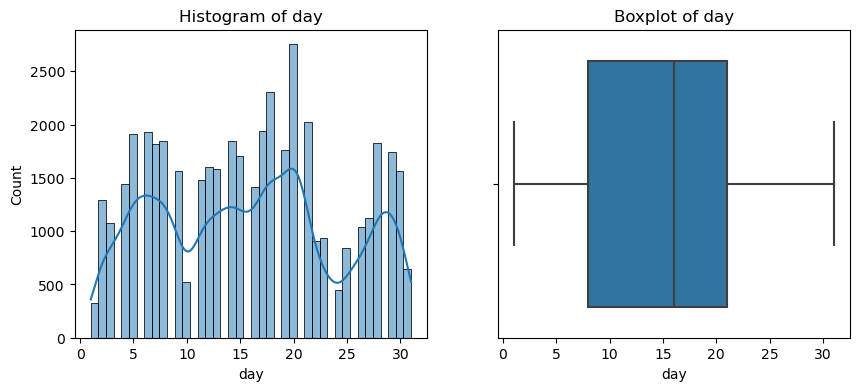

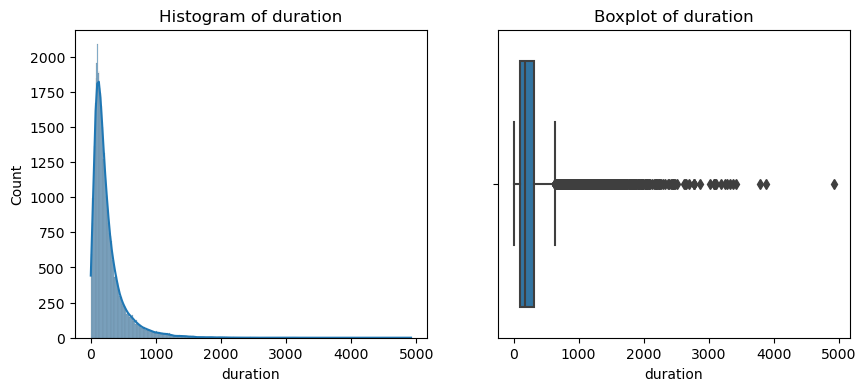

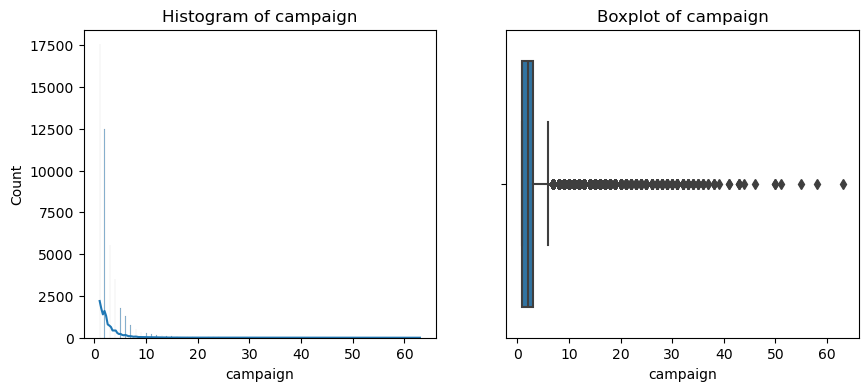

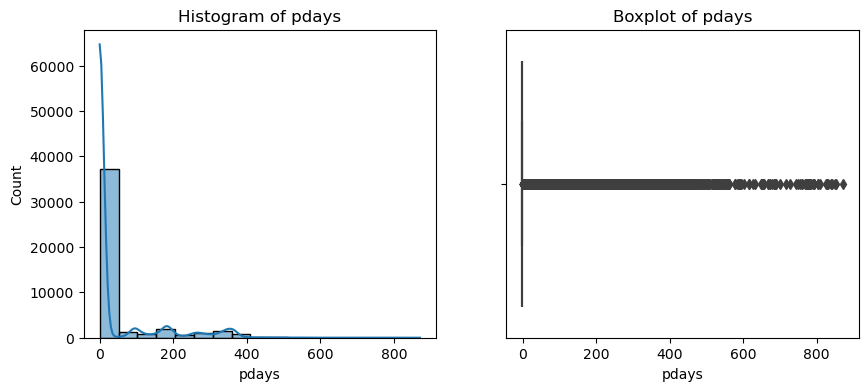

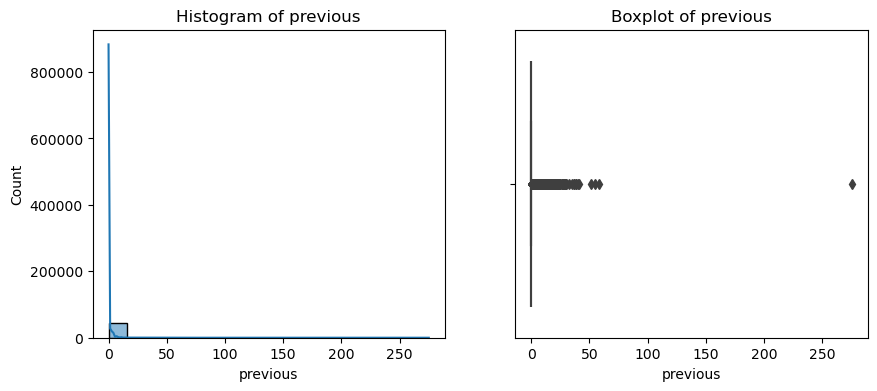

In [21]:
import warnings

# Suppress specific FutureWarnings from Seaborn
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

import seaborn as sns
import matplotlib.pyplot as plt

# Visualizations for numerical variables
for var in numerical_vars:
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[var], kde=True)
    plt.title(f'Histogram of {var}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot of {var}')
    
    plt.show()


               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097713 -0.008851 -0.003159  0.004933 -0.022138  0.001445
balance   0.097713  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.008851  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.003159  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004933 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.022138  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001445  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000


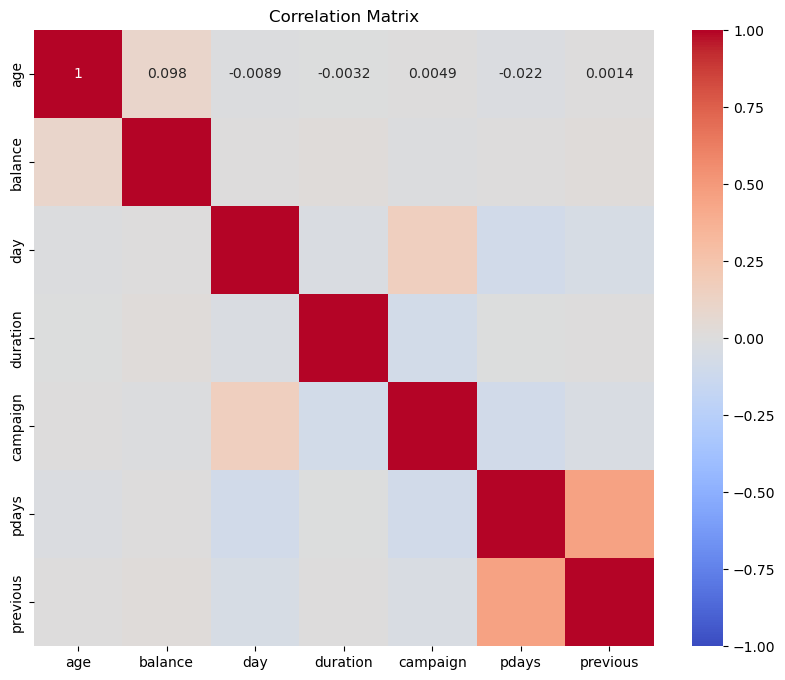

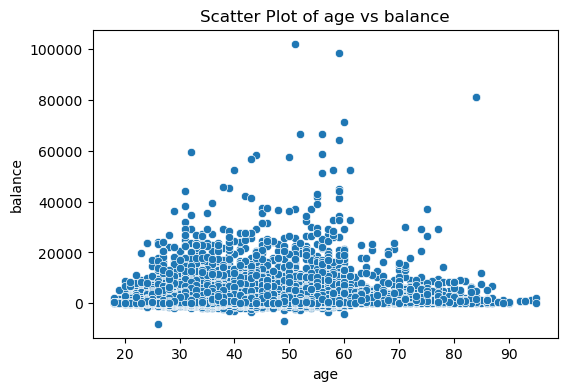

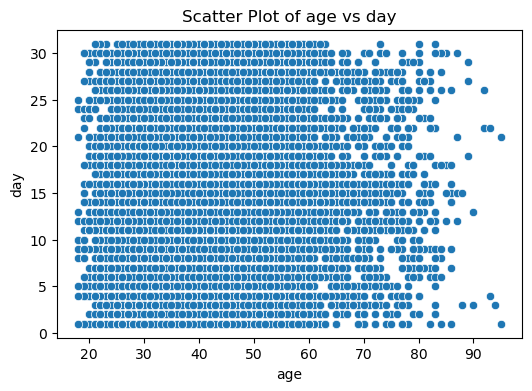

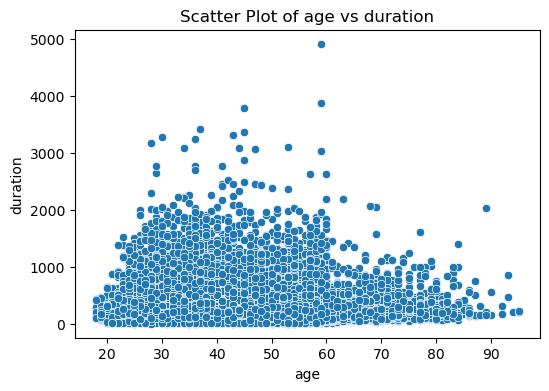

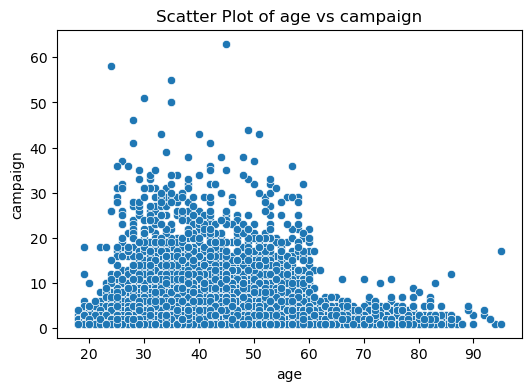

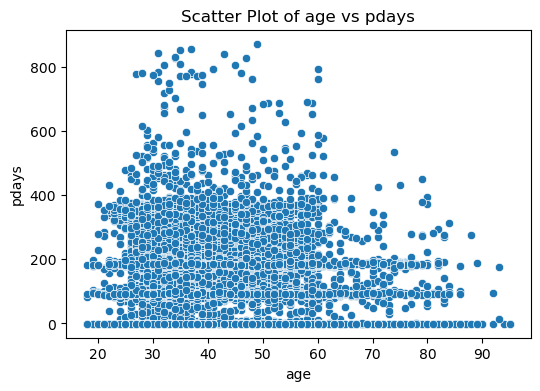

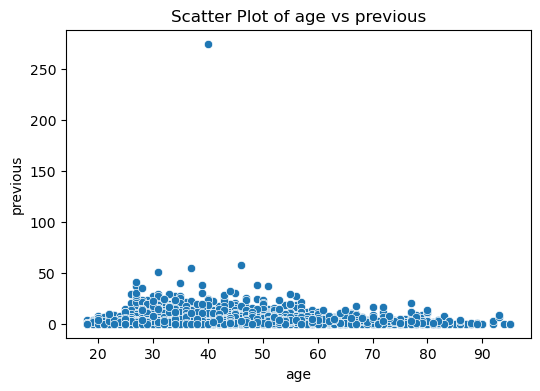

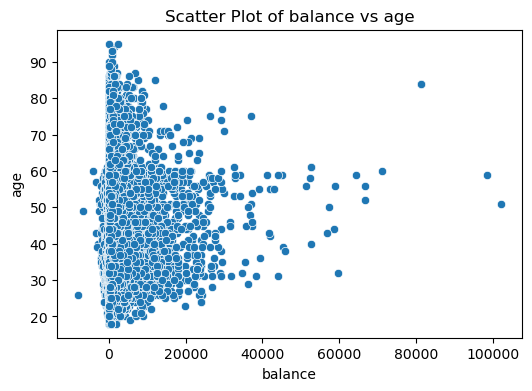

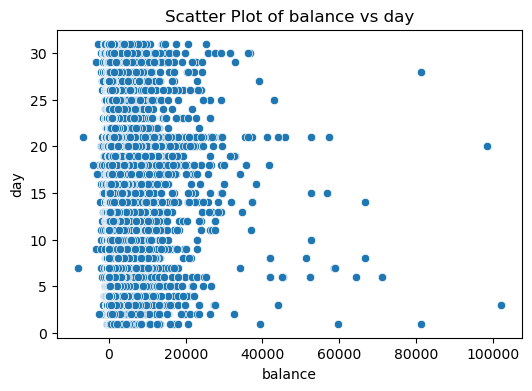

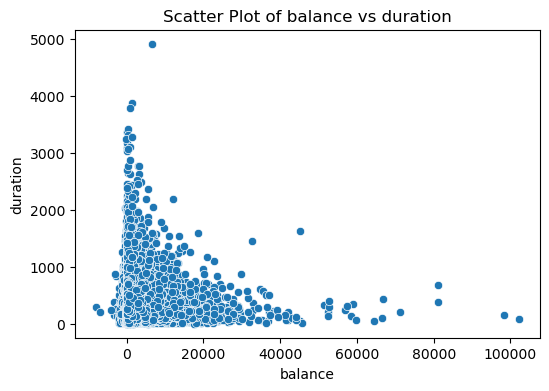

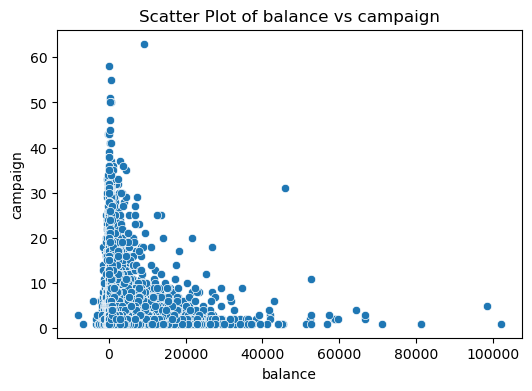

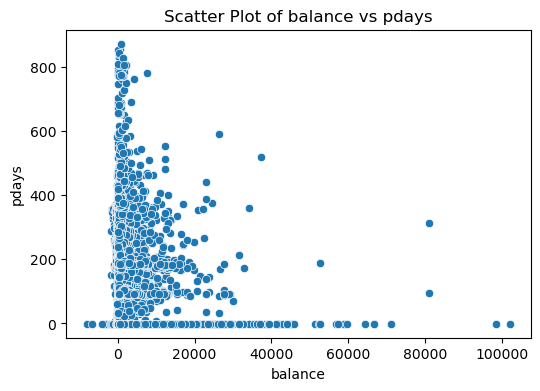

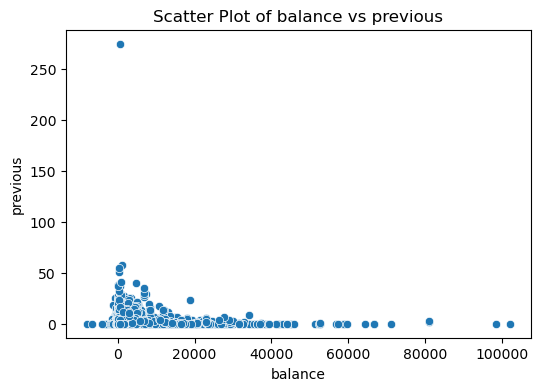

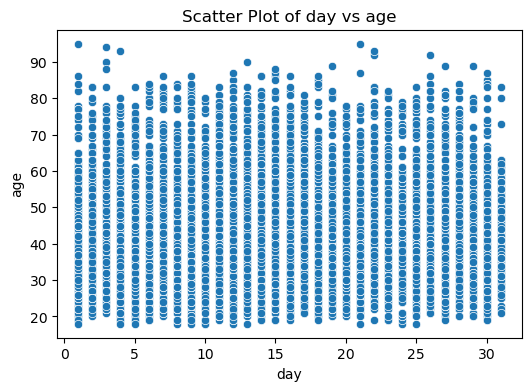

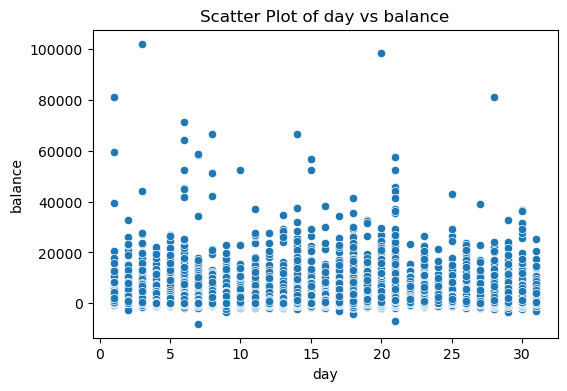

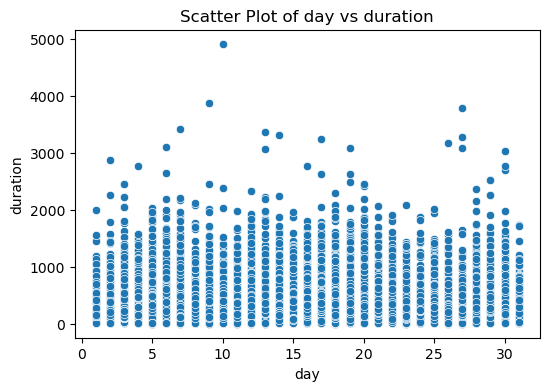

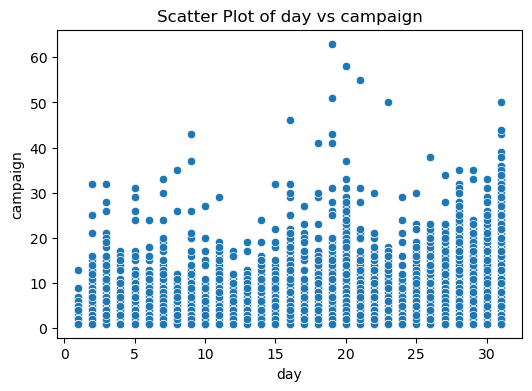

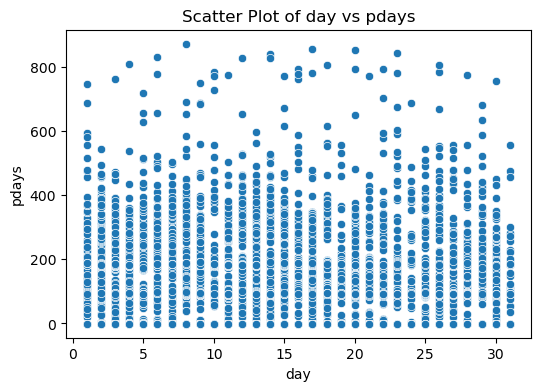

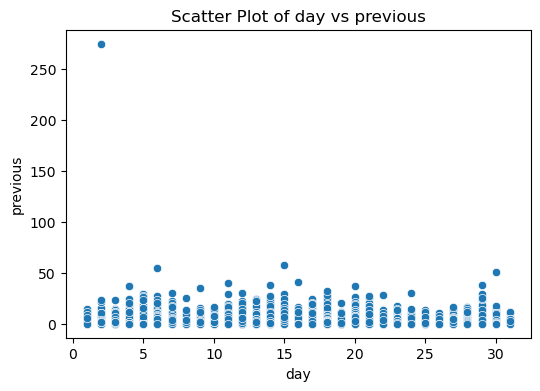

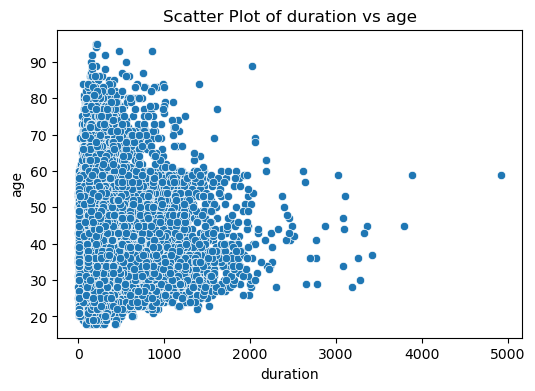

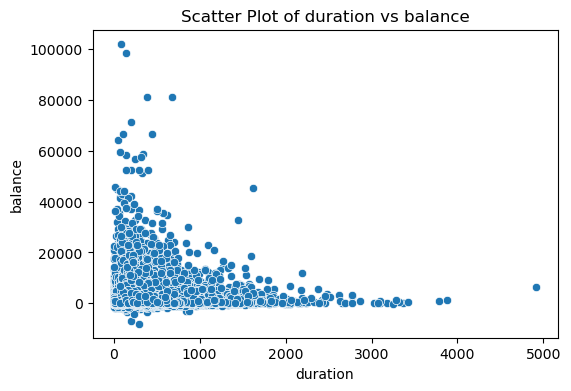

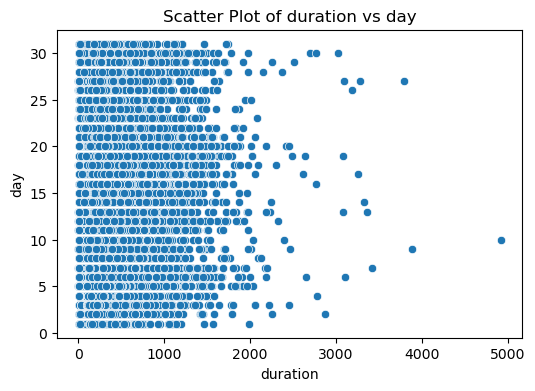

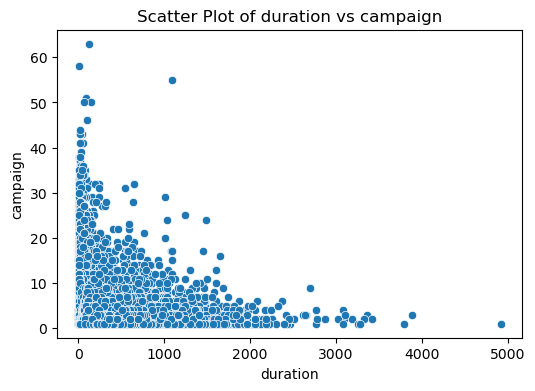

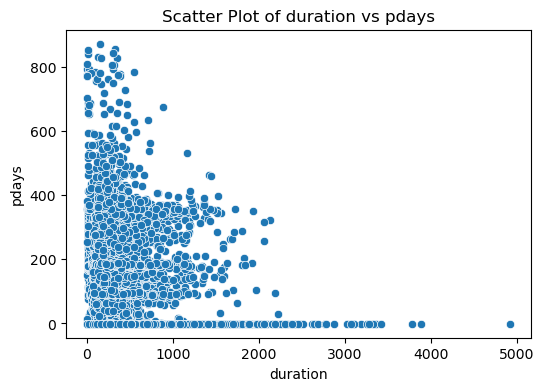

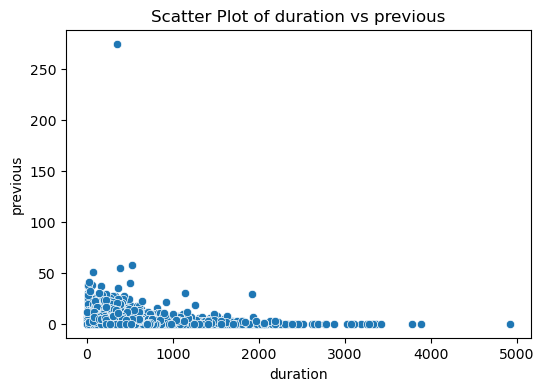

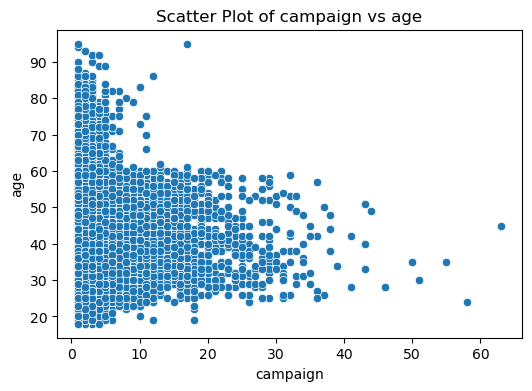

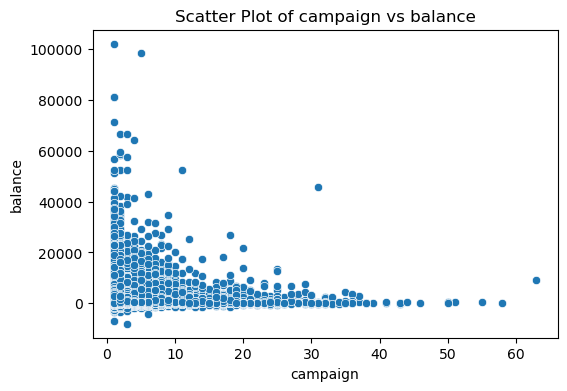

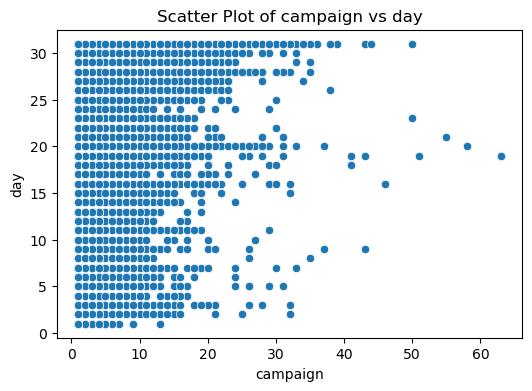

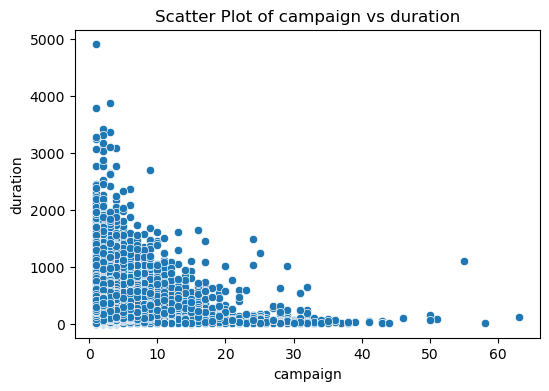

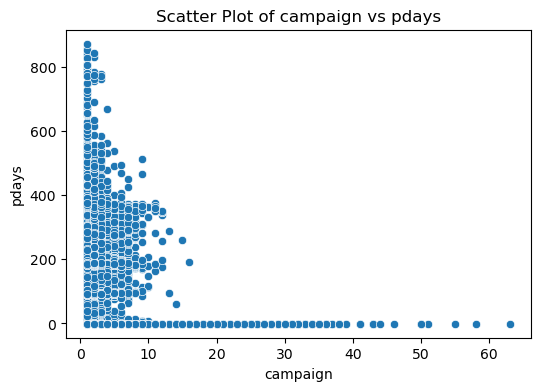

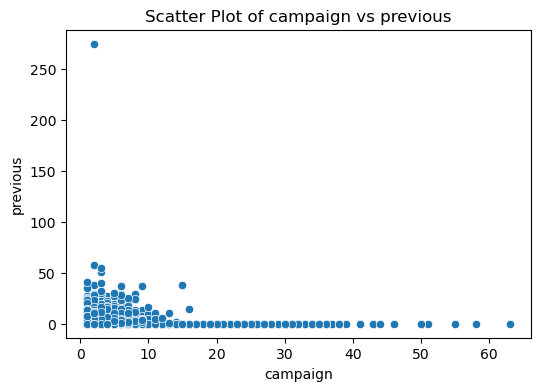

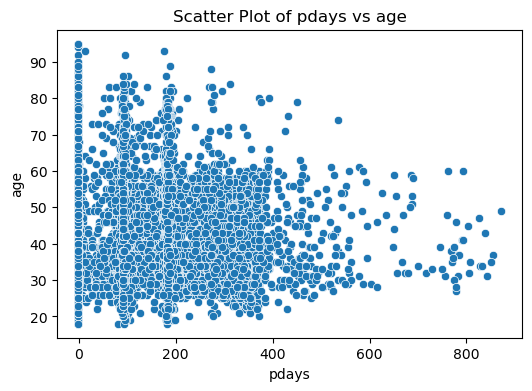

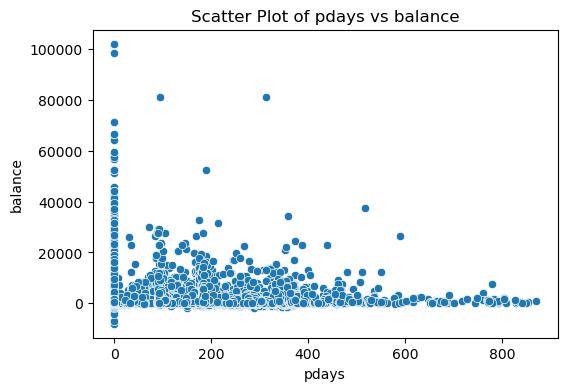

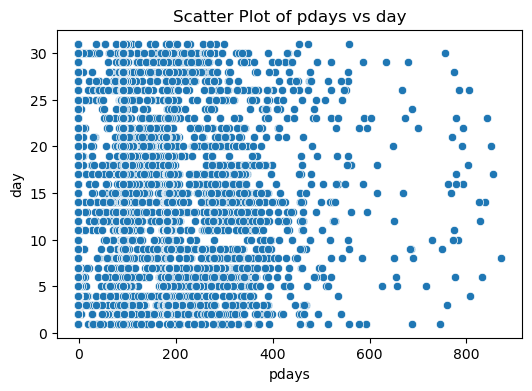

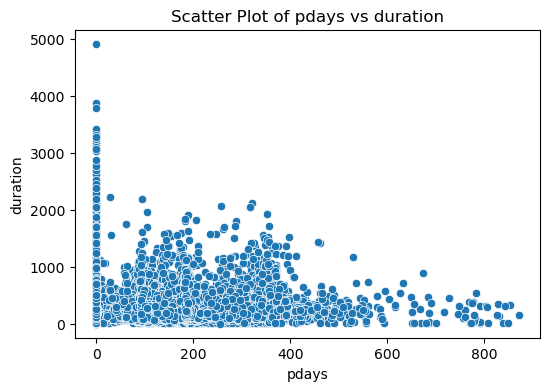

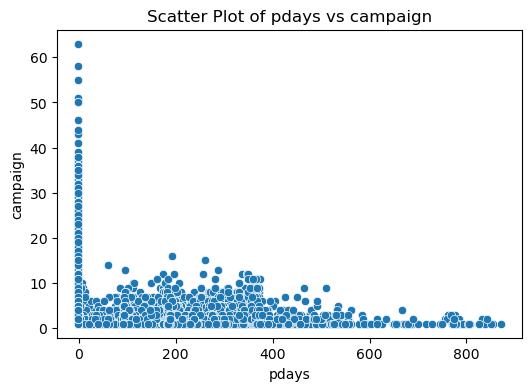

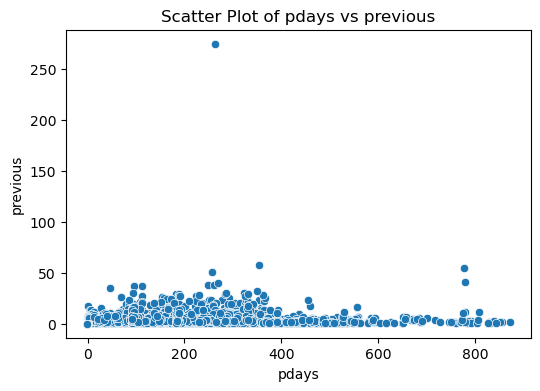

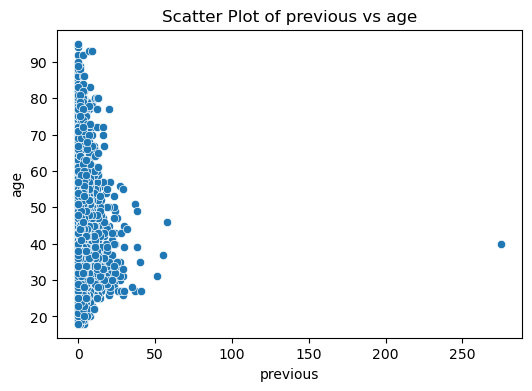

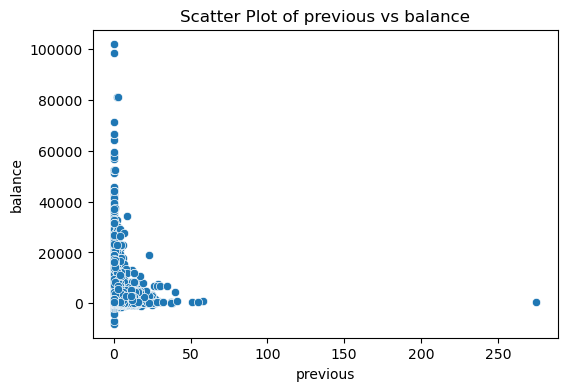

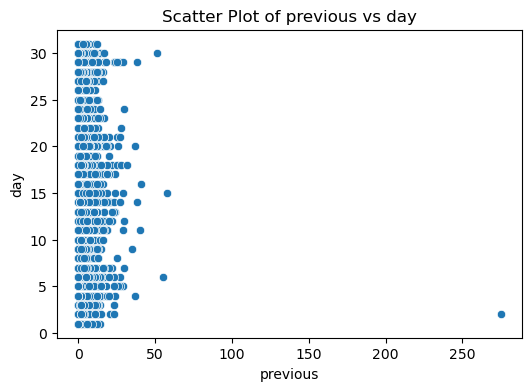

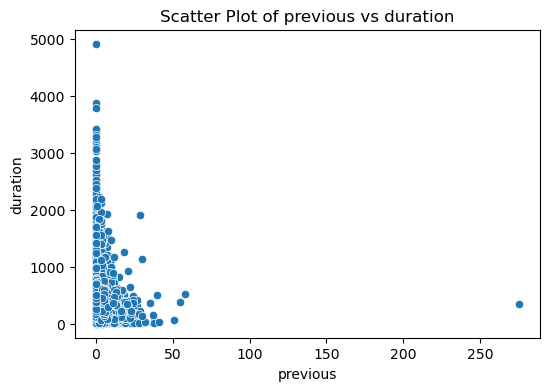

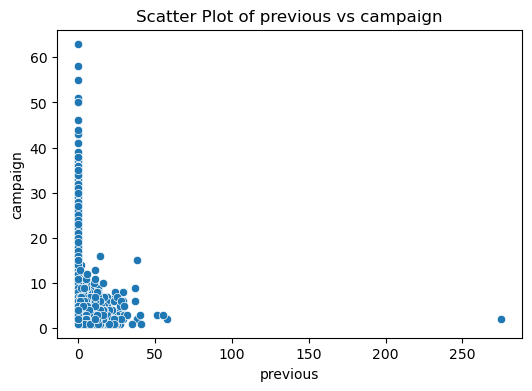

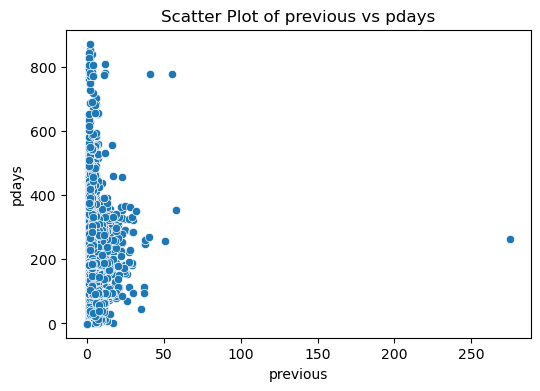

In [20]:
import warnings

# Suppress specific FutureWarnings from Seaborn
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

# Correlation matrix
correlation_matrix = df[numerical_vars].corr()
print(correlation_matrix)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Scatter plots for significant correlations
for var1 in numerical_vars:
    for var2 in numerical_vars:
        if var1 != var2:
            plt.figure(figsize=(6, 4))
            sns.scatterplot(x=df[var1], y=df[var2])
            plt.title(f'Scatter Plot of {var1} vs {var2}')
            plt.show()


Generating Pair Plot...


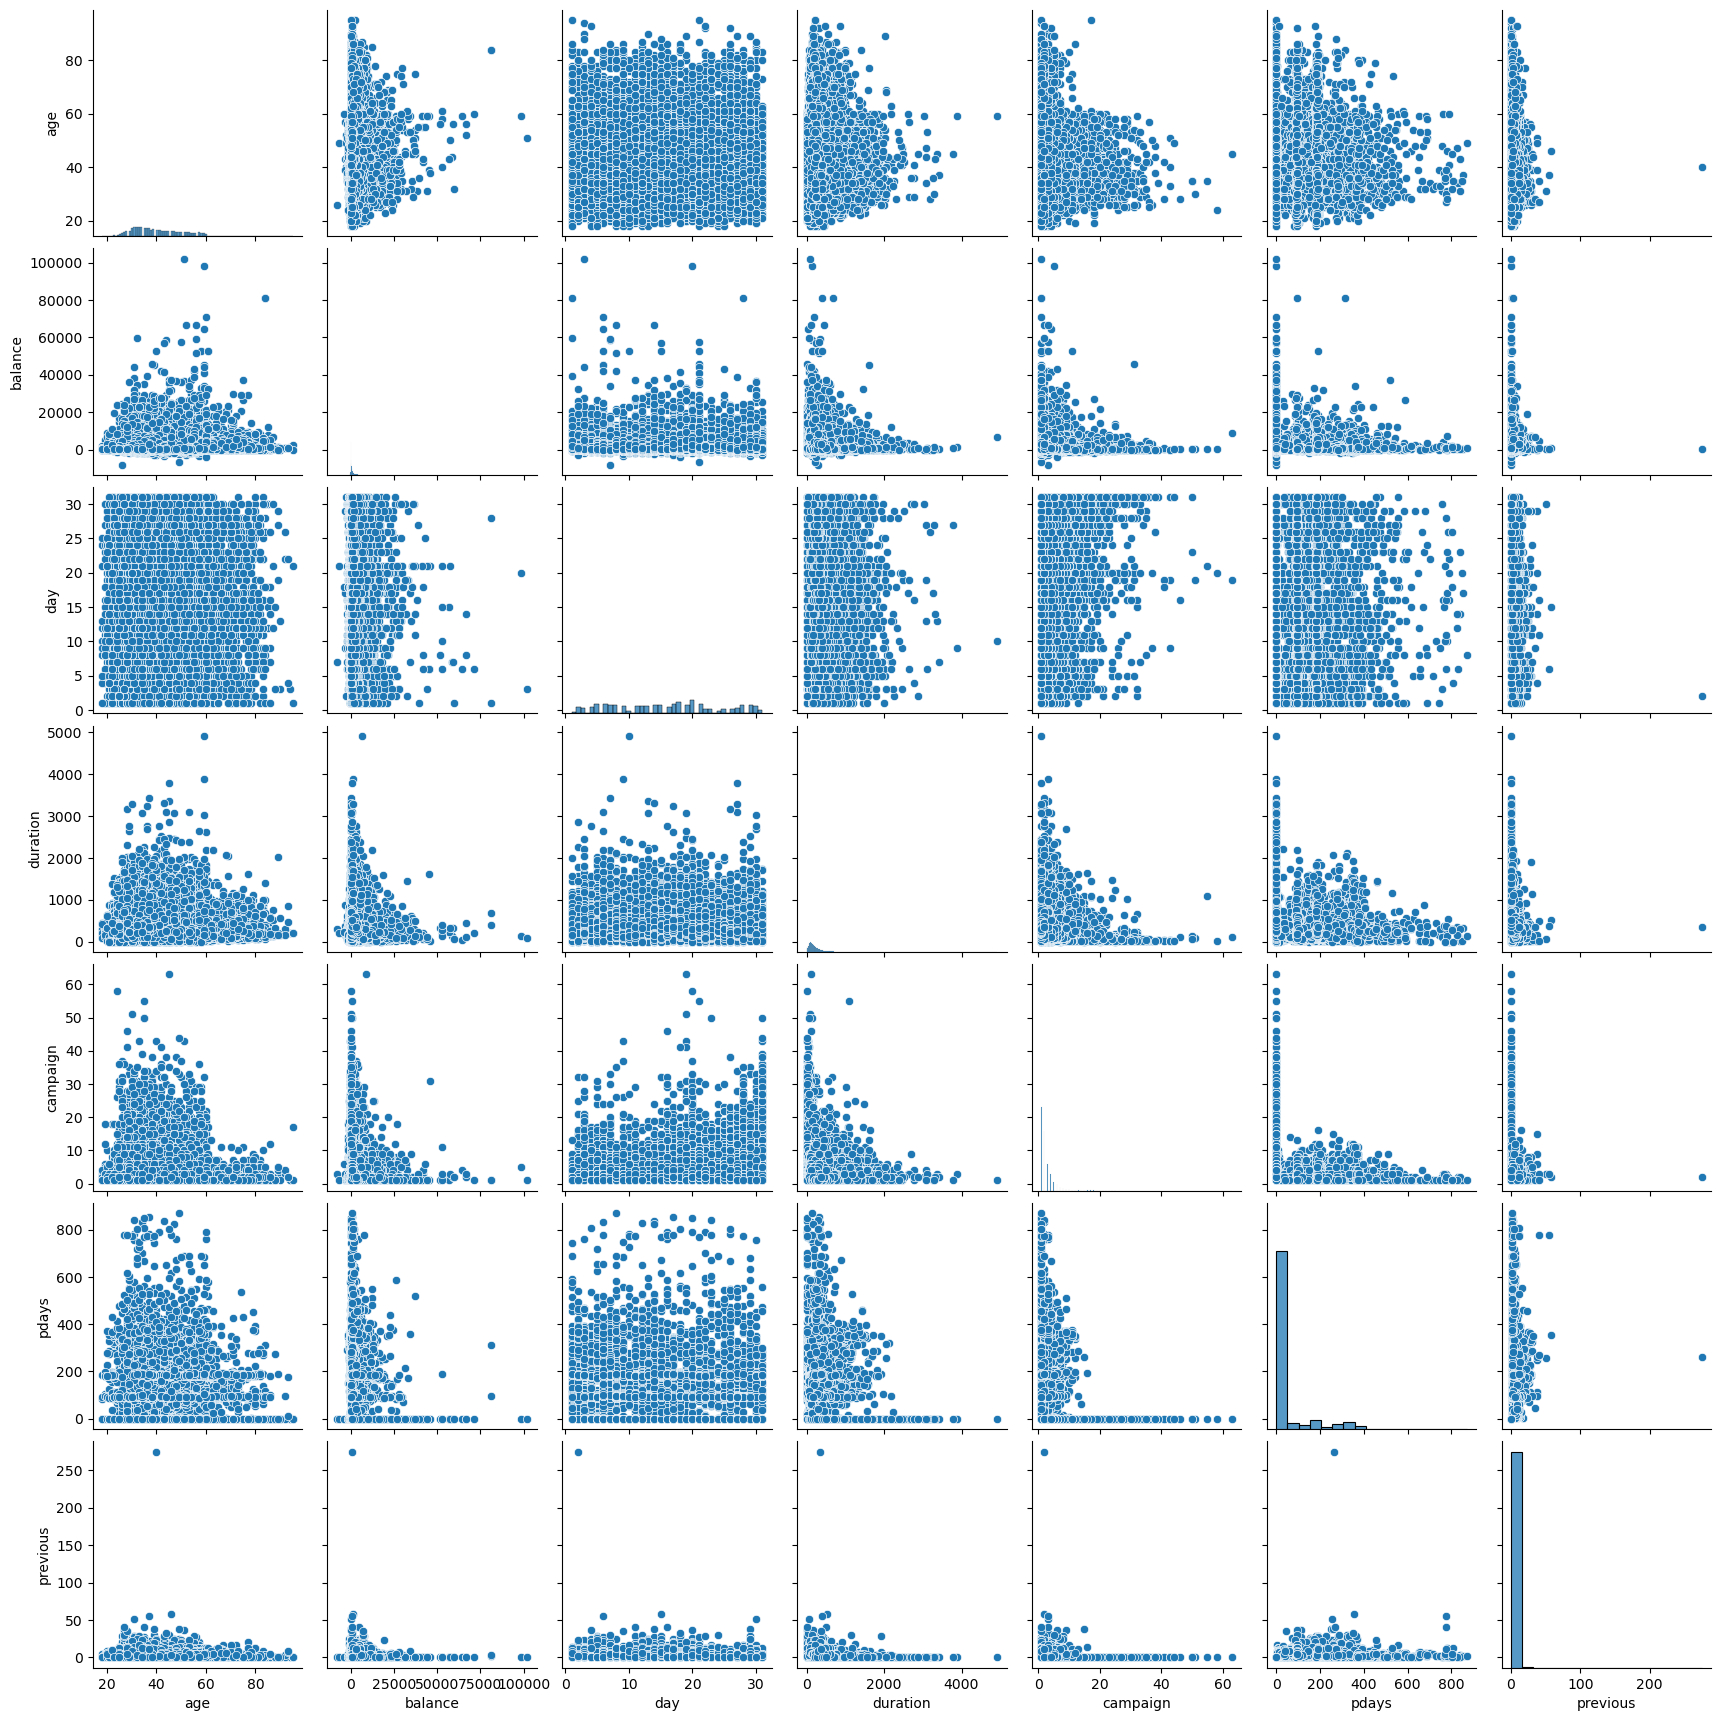

Generating Joint Plot...


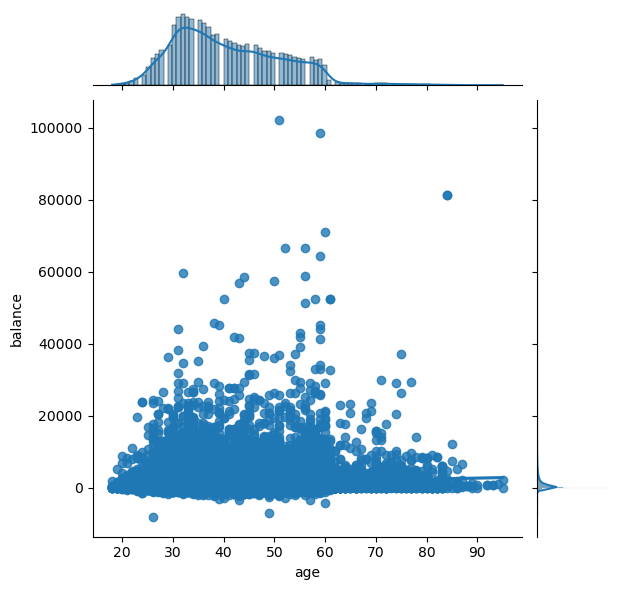

Generating Violin Plot...


ValueError: min() arg is an empty sequence

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Suppress specific FutureWarnings from Seaborn
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

# Ensure inline plotting in Jupyter Notebook
%matplotlib inline

# Verify and clean data (already done in previous steps)
# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check for NaN values and fill or drop as appropriate
# df = df.dropna(subset=numerical_vars)  # Example: drop rows with NaN values in numerical columns

# Pair plot for numerical variables
print("Generating Pair Plot...")
sns.pairplot(df[numerical_vars])
plt.show()

# Joint plot for a pair of variables
print("Generating Joint Plot...")
sns.jointplot(x='age', y='balance', data=df, kind='reg')
plt.show()

# Violin plot for numerical vs categorical variables
print("Generating Violin Plot...")
sns.violinplot(x='education', y='balance', data=df)
plt.show()


**fix this part**


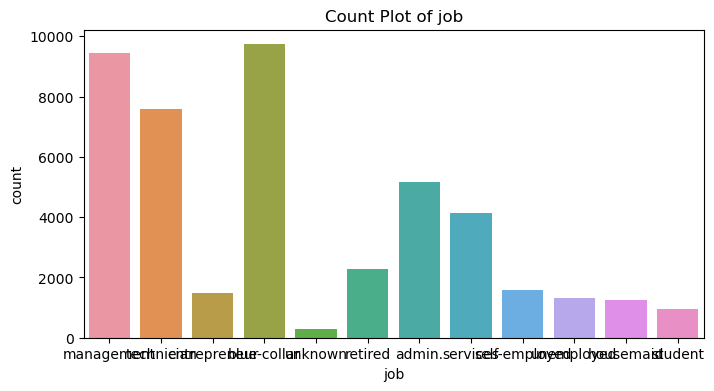

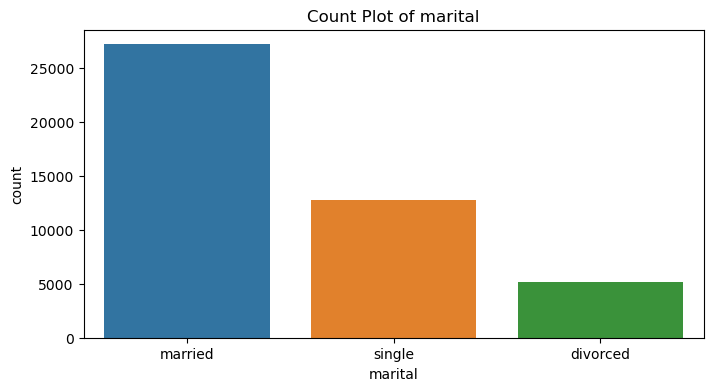

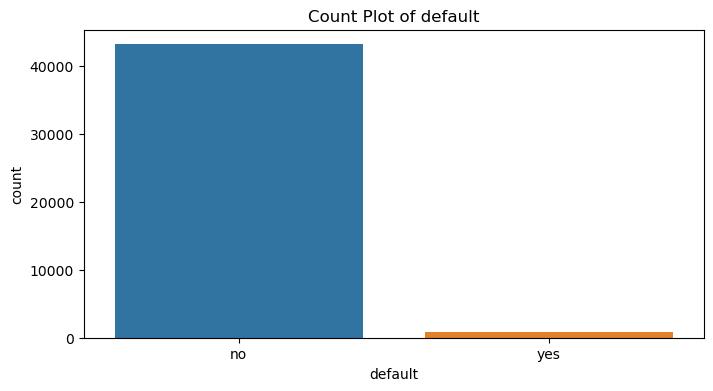

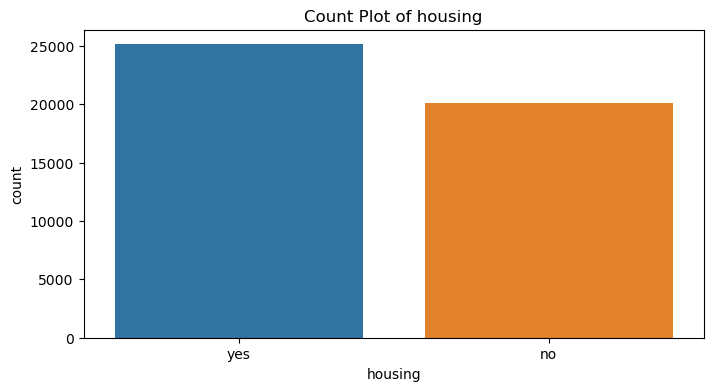

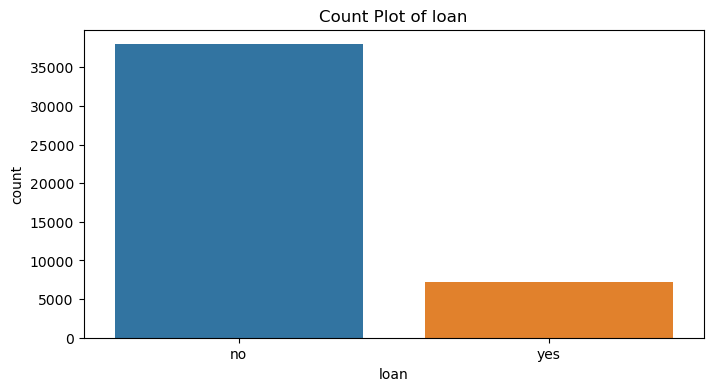

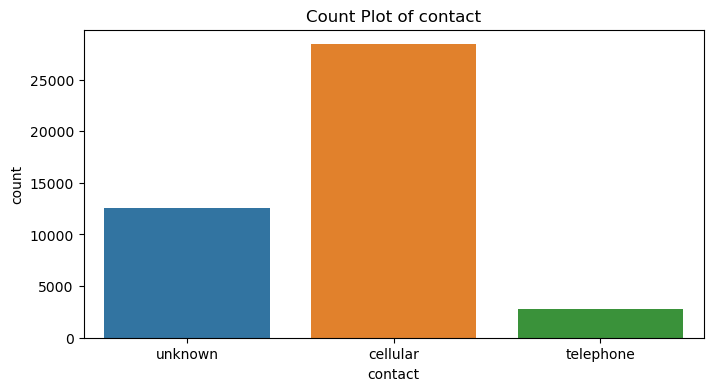

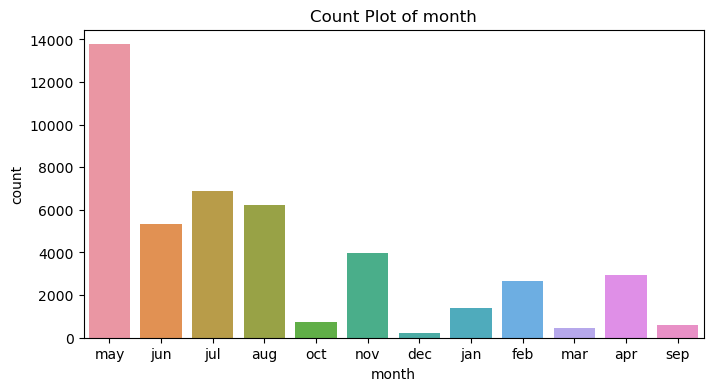

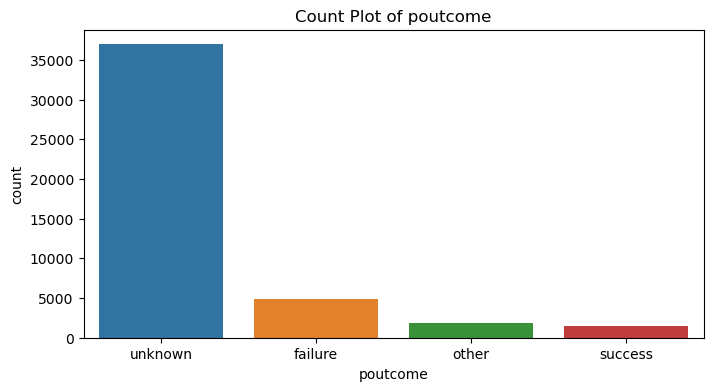

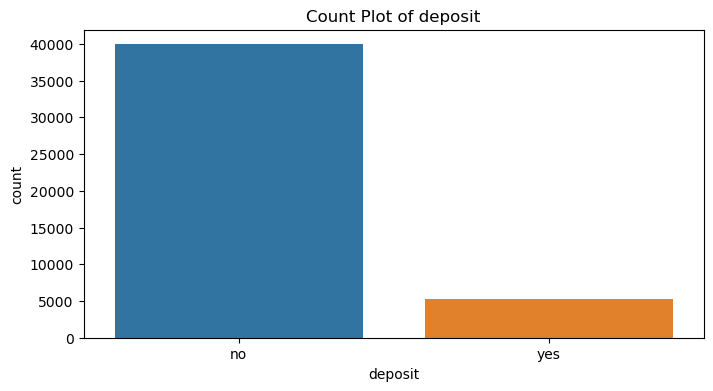

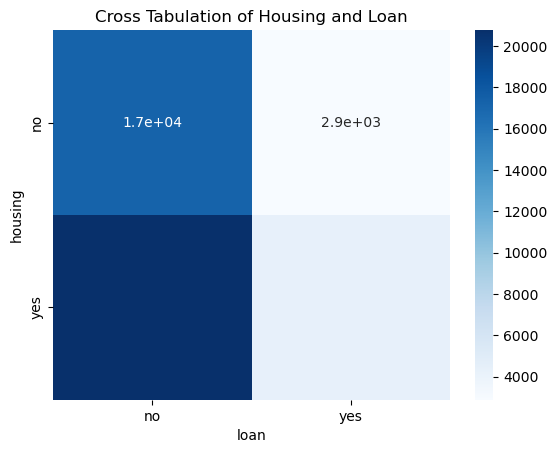

In [25]:
# Count plot for categorical variables
for var in categorical_vars:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[var])
    plt.title(f'Count Plot of {var}')
    plt.show()

# Cross-tabulation and heatmap for categorical variables
cross_tab = pd.crosstab(df['housing'], df['loan'])
sns.heatmap(cross_tab, annot=True, cmap='Blues')
plt.title('Cross Tabulation of Housing and Loan')
plt.show()
